# Классификация текстов

<h1>Описание проекта</h1>

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров. Необходимо разработать инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Цель работы:** обучить модель классифицировать комментарии на позитивные и негативные. В распоряжении набор данных с разметкой о токсичности правок. Требования по качеству к модели: `F1` не меньше 0.75. 

**Задачи**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

<h1>Описание данных</h1>

Данные находятся в файле `toxic_comments.csv`. 
- `text` - текст комментария; 
- `toxic` - целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Обработка-текста" data-toc-modified-id="Обработка-текста-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка текста</a></span><ul class="toc-item"><li><span><a href="#Лемматизация-текста" data-toc-modified-id="Лемматизация-текста-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Лемматизация текста</a></span></li><li><span><a href="#Удаление-лишних-пробелов-и-знаков-пунктуации" data-toc-modified-id="Удаление-лишних-пробелов-и-знаков-пунктуации-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Удаление лишних пробелов и знаков пунктуации</a></span></li><li><span><a href="#Удаление-стоп-слов-и-веторизация-текста" data-toc-modified-id="Удаление-стоп-слов-и-веторизация-текста-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Удаление стоп-слов и веторизация текста</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Подключение библиотек

*Установим и загрузим необходимые библиотеки.*

In [1]:
# !pip install spacy -U
# !pip install numpy --upgrade
# ! spacy download en

In [2]:
import pandas as pd
import numpy as np
import re
import spacy
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import f1_score

C:\Anaconda_3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Загрузка данных

*Напишем функцию, которая будет считывать данные из csv-файла в датафрейм и сохранять их в соответствующую переменную.*

In [3]:
def read_csv(link_1, link_2):
    try:
        data = pd.read_csv(link_1, index_col=[0], parse_dates=[0])
    except:
        data = pd.read_csv(link_2, index_col=[0], parse_dates=[0])
    return data

*Считаем данные.*

In [4]:
data_com = read_csv('C:\\Users\\user\\Desktop\\jupiter_notebook\\nlp\\toxic_comments.csv','/datasets/toxic_comments.csv')

### Изучение данных

*Выведем общую информацию о датасете.*

In [5]:
data_com.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [7]:
data_com['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

In [8]:
print(f"Процент объектов класса 1 к общему объёму датасета: {(sum(data_com['toxic']) / len(data_com) * 100):.2f}%")

Процент объектов класса 1 к общему объёму датасета: 10.16%


### Обработка текста

*Обработку текста проведем в несколько этапов:*

- *Лемматизация текста;*
- *Удаление лишних пробелов и знаков пунктуации;*
- *Удаление стоп-слов;*
- *Векторизация текста с помощью техники tf-idf.*

#### Лемматизация текста

*Для лемматизации текста воспользуемся библиотекой spacy.*

In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
def lemmatize(text):
    return " ".join([token.lemma_ for token in nlp(text)])

In [11]:
data_com['text_lemmatized'] = data_com['text'].apply(lemmatize)

#### Удаление лишних пробелов и знаков пунктуации

In [12]:
def clear_text(text):
    sub_text = re.sub(r'[^a-zA-Z]',' ', text)
    sub_list = sub_text.split()
    cleared_text = " ".join(sub_list)
    
    return cleared_text

In [13]:
data_com['text_lemmatized'] = data_com['text_lemmatized'].apply(clear_text)

#### Удаление стоп-слов и веторизация текста

*Создадим корпус и загрузим стоп-слова.*

In [14]:
corpus = data_com['text_lemmatized'].values

In [15]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Разделим датасет на выборки в соотношении 4:1.*

In [16]:
X_train, X_test, y_train, y_test = train_test_split(corpus, data_com['toxic'], 
                                                    test_size=0.2,
                                                    random_state=12345)

*Векторизуем текст и удалим стоп-слова.*

In [17]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

In [18]:
X_train_vec = count_tf_idf.fit_transform(X_train)

In [19]:
X_test_vec = count_tf_idf.transform(X_test)

### Вывод

В ходе выполнения данного шага работы были успешно загружены и обработаны данные о токсичности твитов. Обработка текста проводилась в несколько этапов:

- *Лемматизация текста;*
- *Удаление лишних пробелов и знаков пунктуации;*
- *Удаление стоп-слов;*
- *Векторизация текста с помощью техники tf-idf.*

## Обучение

In [20]:
def add_row(df, model_name, best_score):
    df.at[len(df), df.columns[0]] = model_name
    df.at[len(df) - 1, df.columns[1]] = best_score
    
    return df

In [21]:
results = pd.DataFrame(columns=['Модель', 'f1-score'])

### Обучение моделей

*Обучим модели LogisticRegression и LGBMClassifier на обучающей выборке и выберем лучшую модель, используя метрику F1.*

`LogisticRegression`

In [22]:
param = {
    'C': [0.0001, 0.01, 1, 10, 50],
    'max_iter': [1000]
             }

model_lr = LogisticRegression()

# инициализируем GridSearchCV
cv_lr = GridSearchCV(estimator = model_lr, 
                           param_grid = param, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'f1',
                          )
cv_lr.fit(X_train_vec, y_train)

print(cv_lr.best_params_)

{'C': 10, 'max_iter': 1000}


In [23]:
print(f'F1 для LogisticRegression модели на валидационной выборке: {cv_lr.best_score_}')

F1 для LogisticRegression модели на валидационной выборке: 0.7582248398578875


In [24]:
add_row(results, 'LogisticRegression', round((cv_lr.best_score_), 4))

,Модель,f1-score
0,LogisticRegression,0.7582


`LGBMClassifier`

In [25]:
param = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'max_depth': [15, 20, 30, 35]
             }

model_lgb = lgb.LGBMClassifier()

# инициализируем GridSearchCV
cv_lgb = GridSearchCV(estimator = model_lgb, 
                           param_grid = param, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'f1',
                          )
cv_lgb.fit(X_train_vec, y_train)

print(cv_lgb.best_params_)

{'learning_rate': 0.3, 'max_depth': 30}


In [26]:
print(f'F1 для LightGBM модели на валидационной выборке: {cv_lgb.best_score_}')

F1 для LightGBM модели на валидационной выборке: 0.7641446493248593


In [27]:
add_row(results, 'LGBMRegressor', round((cv_lgb.best_score_), 4))

,Модель,f1-score
0,LogisticRegression,0.7582
1,LGBMRegressor,0.7641


*Модель LGBMRegressor показала лучший результат. Выберем ее в качестве модели для определения токсичности комментариев.*

### Тестирование лучшей модели

In [28]:
predicted = cv_lgb.best_estimator_.predict(X_test_vec)

In [29]:
f1_score(y_test, predicted)

0.7800445739756559

*Полученный на тестовой выборке результат удовлетворяет требованиям.*

### Вывод

Было проведено обучение моделей МО, таких как LogisticRegression и LGBMRegressor. Результаты получились примерно одинаковыми, у модели LGBMRegressor они немного лучше.
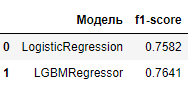
Эта модель была выбрана в качестве модели для определения. На тестовой выборке было получено значение f1-score = 0.78, что удовлетворяет требованиям заказчика.

## Выводы

В ходе проекта были успешно загружены и обработаны данные о токсичности твитов. Обработка текста проводилась в несколько этапов:

- *Лемматизация текста;*
- *Удаление лишних пробелов и знаков пунктуации;*
- *Удаление стоп-слов;*
- *Векторизация текста с помощью техники tf-idf.*

Было проведено обучение моделей МО, таких как LogisticRegression и LGBMRegressor. Результаты получились примерно одинаковыми, у модели LGBMRegressor они немного лучше.

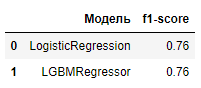

Эта модель была выбрана в качестве модели для определения. На тестовой выборке было получено значение f1-score = 0.78, что удовлетворяет требованиям заказчика.